In [156]:
import math
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection, metrics
from sklearn import preprocessing, cross_validation, svm
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


import quandl

df = quandl.get('BCHARTS/MRCDBRL')

df = df[(df.T != 0).any()] # remove os valores zerados

In [157]:
df.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2011-07-28,23.99,23.99,23.99,23.99,2.0,47.98,23.990000
2011-07-29,23.49,23.50,23.49,23.50,8.0,187.98,23.497500
2011-07-30,23.49,23.49,23.40,23.40,2.0,46.89,23.445000
2011-07-31,23.49,23.50,23.49,23.50,8.5,199.73,23.497647
2011-08-01,23.40,23.40,23.25,23.25,3.0,70.05,23.350000


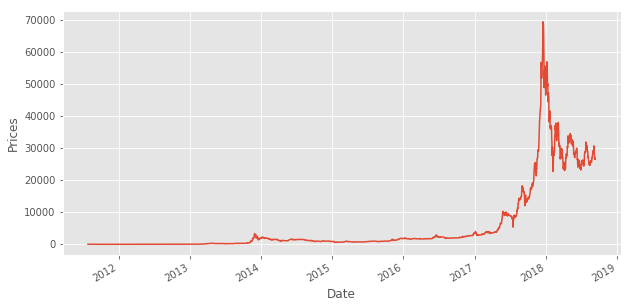

In [158]:
valores = df[['Close']]

valores.Close.plot(figsize=(10,5))

plt.ylabel("Prices")

plt.show()

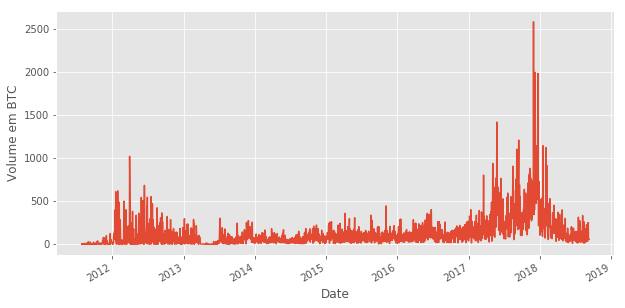

In [127]:
volume = df[['Volume (BTC)']]

volume['Volume (BTC)'].plot(figsize=(10,5))

plt.ylabel("Volume em BTC")

plt.show()

In [128]:
forecast_out = int(30) # predicting 30 days into future

df['Prediction'] = df[['Weighted Price']].shift(-forecast_out)

df

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,Prediction
Date,,,,,,,,
2011-07-28,23.99000,23.99000,23.99000,23.99000,2.000000,4.798000e+01,23.990000,13.000000
2011-07-29,23.49000,23.50000,23.49000,23.50000,8.000000,1.879800e+02,23.497500,13.502549
2011-07-30,23.49000,23.49000,23.40000,23.40000,2.000000,4.689000e+01,23.445000,11.069369
2011-07-31,23.49000,23.50000,23.49000,23.50000,8.500000,1.997300e+02,23.497647,10.575711
2011-08-01,23.40000,23.40000,23.25000,23.25000,3.000000,7.005000e+01,23.350000,10.452394
2011-08-06,18.95000,18.95000,18.95000,18.95000,5.500000,1.042250e+02,18.950000,10.800000
2011-08-08,0.80000,16.00000,0.04000,16.00000,1.000000,1.431100e+01,14.311000,10.083213
2011-08-09,16.00000,19.90000,6.00000,6.00000,7.150000,1.182000e+02,16.531469,13.415066
2011-08-10,19.90000,19.90000,19.90000,19.90000,1.000000,1.990000e+01,19.900000,12.380679


In [140]:
#X = np.array(df.drop(['Prediction'], 1))
X = pd.DataFrame(df, columns=['High', 'Low', 'Volume (BTC)', 'Volume (Currency)', 'Weighted Price'])

X = preprocessing.scale(X)

X_forecast = X[-forecast_out:] # set X_forecast ultimos 30
print(X_forecast)

X = X[:-forecast_out] #remove ultimos 30 dias de X

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)


[[ 1.67370428e+00  1.81503049e+00 -6.89339830e-01 -2.12244594e-01
   1.73044665e+00]
 [ 1.70772025e+00  1.79243179e+00 -2.48300252e-01  9.02419543e-02
   1.73317918e+00]
 [ 1.69101521e+00  1.73019121e+00  7.08595638e-01  7.18981500e-01
   1.67234845e+00]
 [ 1.72546389e+00  1.77096303e+00  2.34532951e-01  4.28046300e-01
   1.75514528e+00]
 [ 1.69101521e+00  1.79789107e+00 -1.88496526e-01  1.33722163e-01
   1.74706376e+00]
 [ 1.72477151e+00  1.84289186e+00 -2.91278133e-01  6.82106612e-02
   1.78378644e+00]
 [ 1.72563705e+00  1.86691332e+00 -5.42788961e-01 -1.07527876e-01
   1.79199373e+00]
 [ 1.71689504e+00  1.87727106e+00 -6.90412038e-01 -2.11549721e-01
   1.78562582e+00]
 [ 1.72130932e+00  1.87218635e+00 -2.90157853e-01  6.90657379e-02
   1.78425970e+00]
 [ 1.73429251e+00  1.87246884e+00 -3.09824304e-01  5.68764697e-02
   1.79558252e+00]
 [ 1.85546897e+00  1.87802435e+00  2.48923231e-01  4.70426121e-01
   1.85943151e+00]
 [ 1.79338681e+00  1.87623529e+00 -2.95767556e-01  7.12915071e-02

In [159]:
y_ultimos30 = pd.DataFrame(df, columns=['Weighted Price'])
y_ultimos30 = y_ultimos30[-forecast_out:]

y_ultimos30


,Weighted Price
Date,
2018-08-12,25097.499901
2018-08-13,25127.876000
2018-08-14,24451.652267
2018-08-15,25372.061751
2018-08-16,25282.223742
2018-08-17,25690.450760
2018-08-18,25781.686944
2018-08-19,25710.898187
2018-08-20,25695.711667


In [131]:
# Treinando

clf = LinearRegression()
clf.fit(X_train, y_train)

#Testando
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.852917725255207


In [160]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)


ultimos_30 = df[-forecast_out:].copy()

ultimos_30['Prediction'] = forecast_prediction

ultimos_30

[23474.20814729 23442.99527772 23419.54948906 24450.45268139
 24370.54727446 24647.85378984 24522.03102233 24311.85105409
 24817.46166563 24829.40545027 24890.24868601 24431.86499202
 25551.22550699 25907.27975914 25202.35510083 26061.46540786
 28124.64625225 27955.98834145 27350.92404929 27643.33223137
 27738.86909674 27644.53704028 29192.35174229 30119.94045538
 27493.80844052 25082.94709884 25902.1140396  25311.56791487
 25130.8601716  24073.32060879]


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,Prediction
Date,,,,,,,,
2018-08-12,25068.00000,25400.00000,24900.00000,25160.00000,15.255425,3.828730e+05,25097.499901,23474.208147
2018-08-13,25160.00000,25793.00000,24660.00000,24930.00000,93.078231,2.338858e+06,25127.876000,23442.995278
2018-08-14,25000.00000,25600.00000,23999.00000,24597.97897,261.925488,6.404511e+06,24451.652267,23419.549489
2018-08-15,24596.99993,25997.99942,24432.00000,25200.00000,178.275652,4.523221e+06,25372.061751,24450.452681
2018-08-16,25072.05050,25600.00000,24717.97800,25435.99899,103.630784,2.620017e+06,25282.223742,24370.547274
2018-08-17,25280.11005,25990.00000,25195.89003,25861.00001,85.494650,2.196396e+06,25690.450760,24647.853790
2018-08-18,25990.00000,26000.00000,25451.00000,25780.00000,41.114782,1.060008e+06,25781.686944,24522.031022
2018-08-19,25780.00000,25899.00000,25561.00000,25898.86000,15.066231,3.873663e+05,25710.898187,24311.851054
2018-08-20,25702.10406,25950.00000,25507.00000,25677.71927,85.692327,2.201925e+06,25695.711667,24817.461666


In [161]:
r2_score = clf.score(X_train,y_train)*100  

float("{0:.2f}".format(r2_score))

85.08